In [111]:
class FindModel:
    def __init__(self,x,y,method,n_cluster=2):
        import sklearn.metrics as mtr
        import numpy as np
        x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1,random_state=40)
        if method == "regressor":
            import sklearn.neighbors as nei
            import sklearn.linear_model as ln
            import sklearn.ensemble as en
            import sklearn.tree as tr
            import sklearn.svm as svm
            self.dict_model={
                'AdaBoostRegressor':en.AdaBoostRegressor(),
#                 'BaggingRegressor':en.BaggingRegressor(),
                'ExtraTreesRegressor':en.ExtraTreesRegressor(),
                'GradientBoostingRegressor':en.GradientBoostingRegressor(),
                'HistGradientBoostingRegressor':en.HistGradientBoostingRegressor(),
                'RandomForestRegressor':en.RandomForestRegressor(),
#                 'StackingRegressor':en.StackingRegressor(),
#                 'VotingRegressor':en.VotingRegressor(),
                'DecisionTreeRegressor':tr.DecisionTreeRegressor(),
                'ExtraTreeRegressor':tr.ExtraTreeRegressor(),
                'KNeighborsRegressor':nei.KNeighborsRegressor(),
                'RadiusNeighborsRegressor':nei.RadiusNeighborsRegressor(),
                'GammaRegressor':ln.GammaRegressor(),
                'HuberRegressor':ln.HuberRegressor(),
                'PassiveAggressiveRegressor':ln.PassiveAggressiveRegressor(),
                'RANSACRegressor':ln.RANSACRegressor(),
                'TweedieRegressor':ln.TweedieRegressor(),
                'LinearRegression':ln.LinearRegression(),
                'TheilSenRegressor':ln.TheilSenRegressor(),
                'LassoCV':ln.LassoCV(),
                'BayesianRidge':ln.BayesianRidge(),
                'ElasticNet':ln.ElasticNet(),
                'Ridge':ln.Ridge(alpha=1.0),
                'SVR':svm.SVR(kernel='rbf'),
                'SGDRegressor':ln.SGDRegressor()
            }

            self.mean_squared_error={}
            self.r2_score={}
            self.score={}
            for model in self.dict_model.keys():
                self.dict_model[model].fit(x_train,y_train)
                y_pred = self.dict_model[model].predict(x_test)
                self.r2_score.update({model:mtr.r2_score(y_test,y_pred)})
                self.mean_squared_error.update({model:mtr.mean_squared_error(y_test,y_pred)})
                self.score.update({model:self.dict_model[model].score(x_test,y_test)})
            self.models=self.dict_model.keys()
#             self.bestMean_squared_error = self.models[np.array(list(self.mean_squared_error.values())).argmin()]
#             self.bestscore = self.models[np.array(list(self.mean_squared_error.values())).argmin()]
        elif method == "multiregress":
            import sklearn.linear_model as ln
            import sklearn.multioutput as mlt
            dict_model = {
                'RegressorChain-LogisticRegression':mt.RegressorChain(ln.LogisticRegression()),
                'RegressorChain-RidgeClassifier':mt.RegressorChain(ln.Ridge()),
                'RegressorChain-LassoCV':mt.RegressorChain(ln.Lasso()),
                'MultiOutputRegressor-LogisticRegression':mt.MultiOutputRegressor(ln.LogisticRegression()),
                'MultiOutputRegressor-RidgeClassifier':mt.MultiOutputRegressor(ln.Ridge()),
                'MultiOutputRegressor-LassoCV':mt.MultiOutputRegressor(ln.Lasso()),
            }
#             self.rand_score={}
#             self.completeness_score={}
            self.score={}
#             self.matthews_corrcoef={}
            for model in self.dict_model.keys():
                self.dict_model[model].fit(x_train,y_train)
                y_pred = self.dict_model[model].predict(x_test)
#                 self.rand_score.update({model:mtr.rand_score(y_test,y_pred)})
#                 self.completeness_score.update({model:mtr.mean_squared_error(y_test,y_pred)})
#                 self.matthews_corrcoef.update({model:mtr.matthews_corrcoef(y_test,y_pred)})
                self.score.update({model:self.dict_model[model].score(x_test,y_test)})
            self.models=self.dict_model.keys()
#             self.bestMean_squared_error = self.models[np.array(list(self.mean_squared_error.values())).argmin()]
#             self.bestscore = self.models[np.array(list(self.mean_squared_error.values())).argmin()]
        elif method == "classe" :
            import sklearn.neighbors as nei
            import sklearn.linear_model as ln
            import sklearn.ensemble as en
            import sklearn.tree as tr
            import sklearn.svm as svm
            import sklearn.naive_bayes as nb
            self.dict_model = {
#                 'AdaBoostClassifier':en.AdaBoostClassifier(),
#                 'BaggingClassifier':en.BaggingClassifier(),
                'ExtraTreesClassifier':en.ExtraTreesClassifier(),
                'GradientBoostingClassifier':en.GradientBoostingClassifier(),
#                 'HistGradientBoostingClassifier':en.HistGradientBoostingClassifier(),
                'RandomForestClassifier':en.RandomForestClassifier(),
#                 'StackingRegressor':en.StackingRegressor(),
#                 'VotingRegressor':en.VotingRegressor(),
                'DecisionTreeClassifier':tr.DecisionTreeClassifier(),
                'ExtraTreeClassifier':tr.ExtraTreeClassifier(),
                'KNeighborsClassifier':nei.KNeighborsClassifier(),
#                 'RadiusNeighborsClassifier':nei.RadiusNeighborsClassifier(),
                'LogisticRegression':ln.LogisticRegression(),
                'LogisticRegressionCV':ln.LogisticRegressionCV(),
                'PassiveAggressiveClassifier':ln.PassiveAggressiveClassifier(),
                'RidgeClassifier':ln.RidgeClassifier(),
                'RidgeClassifierCV':ln.RidgeClassifierCV(),
                'SGDClassifier':ln.SGDClassifier(),
                'SVC':svm.SVC(),
                'BernoulliNB':nb.BernoulliNB(),
                'MultinomialNB':nb.MultinomialNB()
            }

            self.accuracy_score={}
            self.confusion_matrix={}
            self.score={}
            self.matthews_corrcoef={}
            for model in self.dict_model.keys():
                self.dict_model[model].fit(x_train,y_train)
                y_pred = self.dict_model[model].predict(x_test)
                self.accuracy_score.update({model:mtr.accuracy_score(y_test,y_pred)})
                self.confusion_matrix.update({model:mtr.confusion_matrix(y_test,y_pred)})
                self.matthews_corrcoef.update({model:mtr.matthews_corrcoef(y_test,y_pred)})
                self.score.update({model:self.dict_model[model].score(x_test,y_test)})
            self.models=self.dict_model.keys()
#             self.bestMean_squared_error = self.models[np.array(list(self.mean_squared_error.values())).argmin()]
#             self.bestscore = self.models[np.array(list(self.mean_squared_error.values())).argmin()]
        elif method == "multiclass":
            import sklearn.linear_model as ln
            import sklearn.multioutput as mlt
            dict_model = {
                'ClassifierChain-LogisticRegression':mt.ClassifierChain(ln.LogisticRegression()),
                'ClassifierChain-RidgeClassifier':mt.ClassifierChain(ln.RidgeClassifier()),
                'ClassifierChain-LassoCV':mt.ClassifierChain(ln.LassoCV()),
                'MultiOutputClassifier-LogisticRegression':mt.MultiOutputClassifier(ln.LogisticRegression()),
                'MultiOutputClassifier-RidgeClassifier':mt.MultiOutputClassifier(ln.RidgeClassifier()),
                'MultiOutputClassifier-LassoCV':mt.MultiOutputClassifier(ln.LassoCV()),
            }
#             self.rand_score={}
#             self.completeness_score={}
            self.score={}
#             self.matthews_corrcoef={}
            for model in self.dict_model.keys():
                self.dict_model[model].fit(x_train,y_train)
                y_pred = self.dict_model[model].predict(x_test)
#                 self.rand_score.update({model:mtr.rand_score(y_test,y_pred)})
#                 self.completeness_score.update({model:mtr.mean_squared_error(y_test,y_pred)})
#                 self.matthews_corrcoef.update({model:mtr.matthews_corrcoef(y_test,y_pred)})
                self.score.update({model:self.dict_model[model].score(x_test,y_test)})
            self.models=self.dict_model.keys()
#             self.bestMean_squared_error = self.models[np.array(list(self.mean_squared_error.values())).argmin()]
#             self.bestscore = self.models[np.array(list(self.mean_squared_error.values())).argmin()]
        elif method == "cluster" :
            import sklearn.cluster as clu
            self.dict_model = {
                'KMeans':clu.KMeans(n_clusters=n_cluster),
                'MeanShift':clu.MeanShift(),
                'MiniBatchKMeans':clu.MiniBatchKMeans(n_clusters=n_cluster),
                'Birch':clu.Birch(n_clusters=n_cluster)
            }

            self.rand_score={}
            self.completeness_score={}
            self.matthews_corrcoef={}
            for model in self.dict_model.keys():
                self.dict_model[model].fit(x_train,y_train)
                y_pred = self.dict_model[model].predict(x_test)
                self.rand_score.update({model:mtr.rand_score(y_test,y_pred)})
                self.completeness_score.update({model:mtr.mean_squared_error(y_test,y_pred)})
                self.matthews_corrcoef.update({model:mtr.matthews_corrcoef(y_test,y_pred)})
            self.models=self.dict_model.keys()
#             self.bestMean_squared_error = self.models[np.array(list(self.mean_squared_error.values())).argmin()]
#             self.bestscore = self.models[np.array(list(self.mean_squared_error.values())).argmin()]
    @staticmethod
    def transformDataFram(df ,list_embed=[],list_oneHut=[],list_remove=[],dict_clean={},remove_colm_fin=""):
        import pandas as pd
        import numpy as np
        def embeding(colm):
            list1 = []
            list2 = []
            for i in np.array(colm):
                if i not in list1:
                    list1.append(i)
                list2.append([list1.index(i)])
            return [np.array(list2),list1]
        df2 = df.copy()
        for i in dict_clean.keys():
            df2[i].fillna(dict_clean[i],inplace=True)
        if len(list_embed) != 0:
            embed_column={}
        for i in list_embed :
            [arr,list1] = embeding(df2[i])
            embed_column.update({i:list1})
            col = pd.DataFrame(arr,columns=[i])
            df2 = df2.drop(i,axis=1)                
            df2= pd.concat((df2,col),axis=1)
        for i in list_oneHut:
            col = pd.get_dummies(df2[i])
            df2 = df2.drop(i,axis=1)                
            df2= pd.concat((df2,col),axis=1)
        for i in list_remove:
            df2 =df2.drop(i,axis=1)   
        if remove_colm_fin != "":
            col = df2[remove_colm_fin]
            df2 = df2.drop(remove_colm_fin,axis=1)
            df2 = pd.concat((df2,col),axis=1)
        return [df2,list1]

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('../data-csv/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
FindModel.change()

In [108]:
[df2,lists] = FindModel.change(df,list_remove=["work_year","Unnamed: 0"],list_embed=['experience_level','employment_type','salary_currency','employee_residence','company_location','company_size'],list_oneHut=['job_title'],remove_colm_fin='salary')

In [109]:
df2.head(2)

,salary_in_usd,remote_ratio,experience_level,employment_type,salary_currency,employee_residence,company_location,company_size,3D Computer Vision Researcher,AI Scientist,...,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist,salary
0,79833,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,70000
1,260000,0,1,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,260000


In [110]:
lists

{'experience_level': ['MI', 'SE', 'EN', 'EX'],
 'employment_type': ['FT', 'CT', 'PT', 'FL'],
 'salary_currency': ['EUR',
  'USD',
  'GBP',
  'HUF',
  'INR',
  'JPY',
  'CNY',
  'MXN',
  'CAD',
  'DKK',
  'PLN',
  'SGD',
  'CLP',
  'BRL',
  'TRY',
  'AUD',
  'CHF'],
 'employee_residence': ['DE',
  'JP',
  'GB',
  'HN',
  'US',
  'HU',
  'NZ',
  'FR',
  'IN',
  'PK',
  'PL',
  'PT',
  'CN',
  'GR',
  'AE',
  'NL',
  'MX',
  'CA',
  'AT',
  'NG',
  'PH',
  'ES',
  'DK',
  'RU',
  'IT',
  'HR',
  'BG',
  'SG',
  'BR',
  'IQ',
  'VN',
  'BE',
  'UA',
  'MT',
  'CL',
  'RO',
  'IR',
  'CO',
  'MD',
  'KE',
  'SI',
  'HK',
  'TR',
  'RS',
  'PR',
  'LU',
  'JE',
  'CZ',
  'AR',
  'DZ',
  'TN',
  'MY',
  'EE',
  'AU',
  'BO',
  'IE',
  'CH'],
 'company_location': ['DE',
  'JP',
  'GB',
  'HN',
  'US',
  'HU',
  'NZ',
  'FR',
  'IN',
  'PK',
  'CN',
  'GR',
  'AE',
  'NL',
  'MX',
  'CA',
  'AT',
  'NG',
  'ES',
  'PT',
  'DK',
  'IT',
  'HR',
  'LU',
  'PL',
  'SG',
  'RO',
  'IQ',
  'BR',
  '

In [52]:
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1]
y.shape

(607,)

In [14]:
import sklearn.model_selection

In [16]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [114]:
Models = FindModel(x,y,method="regressor")

In [113]:
Models.r2_score

{'AdaBoostRegressor': 0.7067753825540133,
 'ExtraTreesRegressor': 0.8823975674049436,
 'GradientBoostingRegressor': 0.9535360217464776,
 'HistGradientBoostingRegressor': 0.7433422341845546,
 'RandomForestRegressor': 0.930591038129455,
 'DecisionTreeRegressor': 0.9496908690555159,
 'ExtraTreeRegressor': 0.7263211979491968,
 'KNeighborsRegressor': -0.9081805846712321,
 'RadiusNeighborsRegressor': -5.085326066424622e+25,
 'GammaRegressor': -4.3673481675554626e-07,
 'HuberRegressor': -0.0410612849072145,
 'PassiveAggressiveRegressor': -0.04073045853746882,
 'RANSACRegressor': -0.0370685279321068,
 'TweedieRegressor': 0.14672706753942433,
 'LinearRegression': 0.33834526305387336,
 'TheilSenRegressor': 0.12028130256715153,
 'LassoCV': 0.00032311761991066223,
 'BayesianRidge': -0.009104341970966878,
 'ElasticNet': 0.16293409667771697,
 'Ridge': 0.3111476918076671,
 'SVR': -0.030779435100268593,
 'SGDRegressor': -6.095513550029834e+24}

In [99]:
df3 = pd.read_csv('../data-csv/digit.csv')
df3.head(2)

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0


In [71]:
import matplotlib.pyplot  as plt
import numpy 

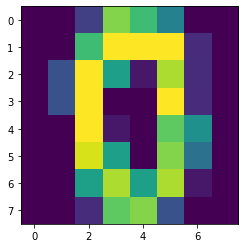

In [91]:
x3 = x2.iloc[20,:]
x3 = numpy.array(x3).reshape(8,8)
plt.imshow(x3)

In [92]:
x2 = df3.iloc[:,1:-1]
y2 = df3.iloc[:,-1]

In [97]:

MODELS2 = FindModel(x2,y2,method="classe")

In [62]:
MODELS2.accuracy_score

{'ExtraTreesClassifier': 0.9777777777777777,
 'GradientBoostingClassifier': 0.9555555555555556,
 'RandomForestClassifier': 0.9722222222222222,
 'DecisionTreeClassifier': 0.8833333333333333,
 'ExtraTreeClassifier': 0.7611111111111111,
 'KNeighborsClassifier': 0.9,
 'LogisticRegression': 0.9611111111111111,
 'LogisticRegressionCV': 0.9777777777777777,
 'PassiveAggressiveClassifier': 0.9,
 'RidgeClassifier': 0.9444444444444444,
 'RidgeClassifierCV': 0.95,
 'SGDClassifier': 0.65,
 'SVC': 0.07222222222222222,
 'BernoulliNB': 0.8777777777777778,
 'MultinomialNB': 0.9055555555555556}

In [93]:
model2 = MODELS2.dict_model["GradientBoostingClassifier"] 

In [94]:
model2.predict(df3.iloc[50:55,:-1])

array([2., 2., 7., 8., 2.])

In [95]:
df3.iloc[50:55,-1]

50    2.0
51    2.0
52    7.0
53    8.0
54    2.0
Name: target, dtype: float64